In [2]:
import pandas as pd
from prophet import Prophet

# Load and prepare
df = pd.read_csv('../data/opd_footfall.csv')
df['datetime'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['hour'], unit='h')
df = df[['datetime', 'total_patients']].rename(columns={"datetime": "ds", "total_patients": "y"})


In [3]:
model = Prophet(
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=False
)

model.fit(df)


22:52:45 - cmdstanpy - INFO - Chain [1] start processing
22:52:48 - cmdstanpy - INFO - Chain [1] done processing


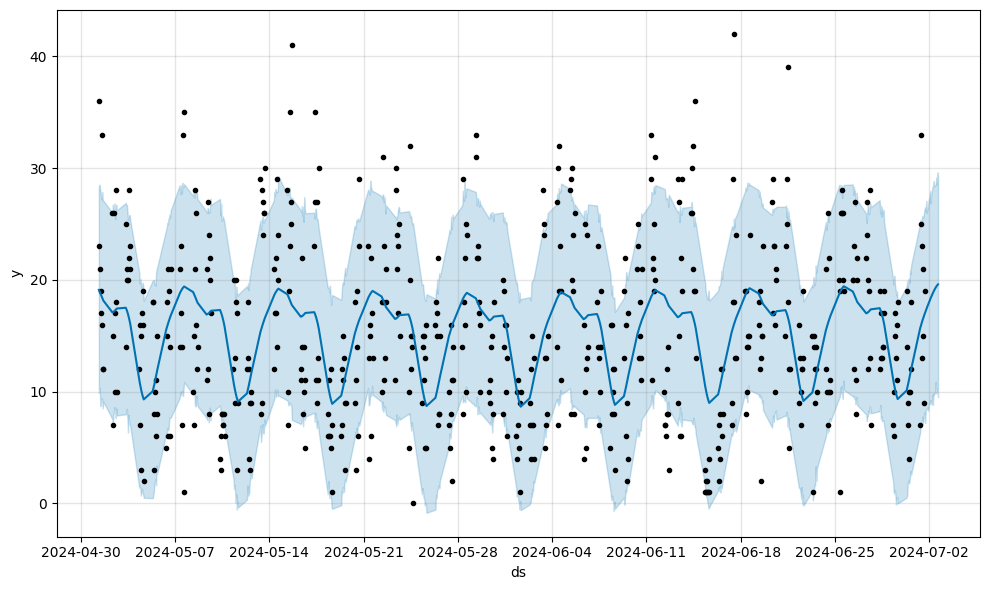

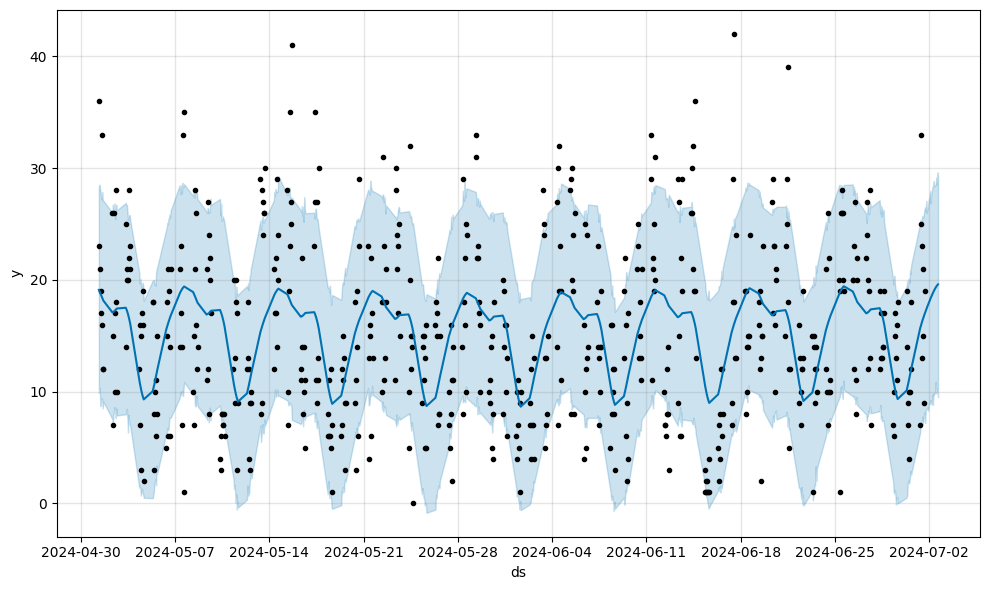

In [5]:
from datetime import timedelta

# Predict for next 24 hours (every hour)
last_time = df['ds'].max()
future = model.make_future_dataframe(periods=24, freq='h')
forecast = model.predict(future)

# Plot
model.plot(forecast)


22:53:41 - cmdstanpy - INFO - Chain [1] start processing
22:53:41 - cmdstanpy - INFO - Chain [1] done processing


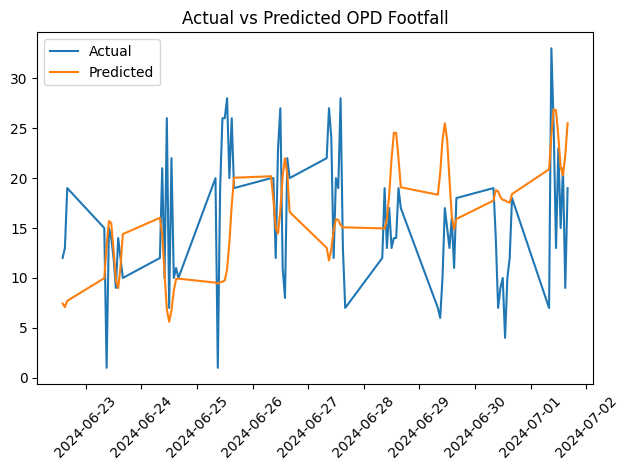

In [7]:
cutoff = int(0.85 * len(df))
train = df.iloc[:cutoff]
test = df.iloc[cutoff:]

model = Prophet(weekly_seasonality=True)
model.fit(train)

future = model.make_future_dataframe(periods=len(test), freq='h')
forecast = model.predict(future)

# Merge to compare
predicted = forecast[['ds', 'yhat']].tail(len(test)).reset_index(drop=True)
actual = test.reset_index(drop=True)
comparison = pd.concat([actual, predicted['yhat']], axis=1)

# Plot actual vs predicted
import matplotlib.pyplot as plt
plt.plot(comparison['ds'], comparison['y'], label='Actual')
plt.plot(comparison['ds'], comparison['yhat'], label='Predicted')
plt.legend()
plt.title("Actual vs Predicted OPD Footfall")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
import pickle
with open('../agents/prophet_model.pkl', 'wb') as f:
    pickle.dump(model, f)
